In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import keras
from tensorflow.keras import callbacks
from tensorflow.keras import layers

In [2]:
df=pd.read_csv("train.csv",index_col=0)
df.shape
df.head()
df["median_house_value"].max()
df["median_house_value"].min()

14999.0

In [3]:
df["ocean_proximity"].value_counts()
#pd.get dummies kullanılıcak

<1H OCEAN     7377
INLAND        5226
NEAR OCEAN    2106
NEAR BAY      1798
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
nullitems=df.columns[df.isnull().any()].tolist()
nullitems

['total_bedrooms']

In [32]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        164
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df2=df.copy()
df2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.97,34.15,33.0,2474.0,472.0,1268.0,437.0,6.4576,500001.0,INLAND
1,-117.92,33.62,37.0,2038.0,379.0,837.0,381.0,5.2416,471300.0,<1H OCEAN
2,-122.33,37.57,43.0,2543.0,621.0,1301.0,606.0,3.1111,318400.0,NEAR OCEAN


In [5]:
df2=pd.get_dummies(df)
df2.head(3)
#For avoiding multicollnearity we are going to drop one of them
df2=df2.drop("ocean_proximity_ISLAND",axis=1)
df2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-117.97,34.15,33.0,2474.0,472.0,1268.0,437.0,6.4576,500001.0,0,1,0,0
1,-117.92,33.62,37.0,2038.0,379.0,837.0,381.0,5.2416,471300.0,1,0,0,0
2,-122.33,37.57,43.0,2543.0,621.0,1301.0,606.0,3.1111,318400.0,0,0,0,1


In [179]:
X=df2.drop(columns="median_house_value")
Y=df2["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1703,-117.71,33.60,25.0,3011.0,714.0,893.0,654.0,2.3387,1,0,0,0
12531,-117.10,32.69,29.0,4174.0,1195.0,3675.0,1124.0,1.8112,0,0,0,1
7966,-117.33,33.16,29.0,3559.0,552.0,1533.0,545.0,4.0585,0,0,0,1
8599,-117.09,32.78,28.0,1708.0,393.0,816.0,393.0,2.9881,0,0,0,1
13440,-118.35,34.03,42.0,2043.0,512.0,1634.0,501.0,1.9928,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-121.35,38.65,20.0,2498.0,546.0,1185.0,506.0,3.2243,0,1,0,0
10955,-122.08,37.72,32.0,2476.0,368.0,1048.0,367.0,5.6194,0,0,1,0
5192,-122.65,38.25,23.0,4030.0,NaN,1852.0,778.0,3.4020,1,0,0,0
12172,-121.43,37.73,40.0,1718.0,391.0,1312.0,388.0,2.9955,0,1,0,0


In [180]:
dummy=df.select_dtypes(include=object).columns.tolist()
noscale=dummy +[Y.name]
scalelist=[col for col in df.columns if col not in noscale]
scalelist

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [181]:
dummy

['ocean_proximity']

In [182]:
noscale
scalelist

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [235]:
pre_pipeline=Pipeline([
    ('impute_values',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())])

In [208]:
x_train.values[:,8:12]

(11558, 4)

In [193]:
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), scalelist)],
    remainder='passthrough'
)[0,7]

In [194]:
preprocessor.fit_transform(x_train)

array([[ 0.92697233, -0.9500438 , -0.28570852, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.23095479, -1.37433163,  0.03339271, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.11633845, -1.15519396,  0.03339271, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.5347872 ,  1.21802037, -0.44525914, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92682229,  0.97557018,  0.9109211 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.90205574, -0.79151868,  0.9109211 , ...,  0.        ,
         0.        ,  0.        ]])

In [235]:
pipefin = Pipeline([("columntrans",column_trans),("Imputer",SimpleImputer(strategy='median')),('Regressor',RandomForestRegressor())])

search_space = [{'Regressor': [Ridge()],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [KNeighborsRegressor()],
                 'Regressor__n_neighbors':[3,5,6,8,10]},
                {'Regressor': [Lasso(max_iter = 10000)],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [AdaBoostRegressor()],
                 "Regressor__n_estimators":[1000,5000,10000],
                'Regressor__learning_rate':[0.1,0.01,0.001]},
                {'Regressor': [RandomForestRegressor(random_state=0)],
                 'Regressor__n_estimators': [80, 120,200],
                 'Regressor__max_features': [5,7,9,11]},
                {'Regressor': [XGBRegressor()],
                 'Regressor__n_estimators': [1000,5000,10000],
                 'Regressor__learning_rate': [0.1,0.01,0.001]
                }
               ]




clf = GridSearchCV(pipefin, search_space, cv=5, verbose=2,scoring='neg_mean_squared_error',n_jobs = -1)
# Fit grid search
best_model = clf.fit(x_train.values, y_train.values)
# View best model
best_model.best_estimator_.get_params()['Regressor']

Fitting 5 folds for each of 55 candidates, totalling 275 fits


KeyboardInterrupt: 

47621.698572184396

In [234]:
y_pred=best_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
mean_absolute_percentage_error(y_test, y_pred)
#best_model.best_score_
#y_pred

0.1752890790648939

In [63]:
y_test.values

array([136000., 167500., 207300., ..., 243300., 251800., 207000.])

In [275]:
# Create a pipeline
pipefin = Pipeline([("pre",pre_pipeline),('Regressor',RandomForestRegressor())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'Regressor': [Ridge()],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [KNeighborsRegressor()],
                 'Regressor__n_neighbors':[2,3,4,5,6]},
                {'Regressor': [GradientBoostingRegressor(random_state=0)],
                 "Regressor__n_estimators":[100,1000,5000,10000],
                'Regressor__learning_rate':[1,0.1,0.01,0.001]},
                {'Regressor': [AdaBoostRegressor()],
                 "Regressor__n_estimators":[100,1000,5000,10000],
                'Regressor__learning_rate':[1,0.1,0.01,0.001]},
                {'Regressor': [XGBRegressor()],
                 'Regressor__n_estimators': [1000,5000,10000],
                 'Regressor__learning_rate': [0.1,0.01,0.001,0.05, 0.25, 0.30]}]

# Create grid search 
clf = GridSearchCV(pipefin, search_space, cv=5, verbose=1,scoring='neg_mean_squared_error',n_jobs = -1)
# Fit grid search
best_model = clf.fit(x_train, y_train)
# View best model
best_model.best_estimator_.get_params()['Regressor']

Fitting 5 folds for each of 65 candidates, totalling 325 fits


GradientBoostingRegressor(learning_rate=0.01, n_estimators=10000,
                          random_state=0)

In [287]:
best_model.best_score_
y_pred=best_model.predict(x_test)
mean_squared_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)

0.18798105151163183

In [293]:
y_pred

array([153548.83409742, 211555.94179442, 243846.87625697, ...,
       268602.13523907, 285293.50248513, 288125.91550558])

In [289]:
y_test

11418    136000.0
6821     167500.0
9138     207300.0
4175     389800.0
15220    104600.0
           ...   
14809    120400.0
14192    103000.0
3985     243300.0
1987     251800.0
8271     207000.0
Name: median_house_value, Length: 4954, dtype: float64

In [278]:
deneme=pre_pipeline.fit_transform(x_train)
denemef=pd.DataFrame(deneme,columns=x_train.columns)
denemef

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.926972,-0.950044,-0.285709,0.165790,0.420026,-0.473475,0.398482,-0.815071,1.116838,-0.682375,-0.353519,-0.379495
1,1.230955,-1.374332,0.033393,0.701431,1.571536,1.974778,1.628059,-1.091045,-0.895385,-0.682375,-0.353519,2.635079
2,1.116338,-1.155194,0.033393,0.418182,0.032199,0.089746,0.113325,0.084685,-0.895385,-0.682375,-0.353519,2.635079
3,1.235938,-1.332369,-0.046383,-0.434330,-0.348446,-0.541238,-0.284325,-0.475321,-0.895385,-0.682375,-0.353519,2.635079
4,0.608040,-0.749556,1.070472,-0.280040,-0.063561,0.178630,-0.001784,-0.996037,1.116838,-0.682375,-0.353519,-0.379495
...,...,...,...,...,...,...,...,...,...,...,...,...
11553,-0.886956,1.404521,-0.684585,-0.070481,0.017835,-0.216505,0.011296,-0.351747,-0.895385,1.465470,-0.353519,-0.379495
11554,-1.250738,0.970908,0.272719,-0.080614,-0.408296,-0.337070,-0.352344,0.901308,-0.895385,-0.682375,2.828702,-0.379495
11555,-1.534787,1.218020,-0.445259,0.635110,-0.243110,0.370477,0.722881,-0.258779,1.116838,-0.682375,-0.353519,-0.379495
11556,-0.926822,0.975570,0.910921,-0.429725,-0.353234,-0.104741,-0.297406,-0.471450,-0.895385,1.465470,-0.353519,-0.379495


In [220]:
int_pipeline=Pipeline([
    ('impute_values',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())])

In [217]:
la=transfr.fit_transform(x_train)
la_df=pd.DataFrame(la,columns=x_train.columns)
la_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,714.0,-117.71,33.60,25.0,3011.0,893.0,654.0,2.3387,1.0,0.0,0.0,0.0
1,1195.0,-117.10,32.69,29.0,4174.0,3675.0,1124.0,1.8112,0.0,0.0,0.0,1.0
2,552.0,-117.33,33.16,29.0,3559.0,1533.0,545.0,4.0585,0.0,0.0,0.0,1.0
3,393.0,-117.09,32.78,28.0,1708.0,816.0,393.0,2.9881,0.0,0.0,0.0,1.0
4,512.0,-118.35,34.03,42.0,2043.0,1634.0,501.0,1.9928,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11553,546.0,-121.35,38.65,20.0,2498.0,1185.0,506.0,3.2243,0.0,1.0,0.0,0.0
11554,368.0,-122.08,37.72,32.0,2476.0,1048.0,367.0,5.6194,0.0,0.0,1.0,0.0
11555,437.0,-122.65,38.25,23.0,4030.0,1852.0,778.0,3.4020,1.0,0.0,0.0,0.0
11556,391.0,-121.43,37.73,40.0,1718.0,1312.0,388.0,2.9955,0.0,1.0,0.0,0.0


In [218]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1703,-117.71,33.60,25.0,3011.0,714.0,893.0,654.0,2.3387,1,0,0,0
12531,-117.10,32.69,29.0,4174.0,1195.0,3675.0,1124.0,1.8112,0,0,0,1
7966,-117.33,33.16,29.0,3559.0,552.0,1533.0,545.0,4.0585,0,0,0,1
8599,-117.09,32.78,28.0,1708.0,393.0,816.0,393.0,2.9881,0,0,0,1
13440,-118.35,34.03,42.0,2043.0,512.0,1634.0,501.0,1.9928,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7813,-121.35,38.65,20.0,2498.0,546.0,1185.0,506.0,3.2243,0,1,0,0
10955,-122.08,37.72,32.0,2476.0,368.0,1048.0,367.0,5.6194,0,0,1,0
5192,-122.65,38.25,23.0,4030.0,NaN,1852.0,778.0,3.4020,1,0,0,0
12172,-121.43,37.73,40.0,1718.0,391.0,1312.0,388.0,2.9955,0,1,0,0


In [185]:
x_train.longitude.max()

-114.49

In [184]:
la[0]

array([ 7.14000000e+02,  9.26972334e-01, -9.50043801e-01, -2.85708522e-01,
        1.65790438e-01,  4.15469512e-01, -4.73475152e-01,  3.98482104e-01,
       -8.15070830e-01,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [91]:
df2["total_bedrooms"]=alala
df2["total_bedrooms"][null_index]
df2[df2["total_bedrooms"].idxmax():df2["total_bedrooms"].idxmax()+1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8946,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN


In [77]:
median_imputer = SimpleImputer(strategy='median')

result_median_imputer = median_imputer.fit_transform(df2)

pd.DataFrame(result_median_imputer, columns=df2.columns)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'INLAND'

In [80]:
df[df["ocean_proximity"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
df[df["total_bedrooms"].isnull()].index

# EXTRA NEURAL NETWORKS

In [156]:
x_train_N, x_rem, y_train_N, y_rem = train_test_split(X,Y, train_size=0.6,random_state=42)
print(f"train data shape: {x_train_N.shape} \nremaining data shape: {x_rem.shape}")

train data shape: (9907, 12) 
remaining data shape: (6605, 12)


In [157]:
x_valid_N, x_test_N, y_valid_N, y_test_N = train_test_split(x_rem,y_rem, test_size=0.5,random_state=10)
print(f"validation data shape: {x_valid_N.shape} \ntest data shape: {x_test_N.shape}")

validation data shape: (3302, 12) 
test data shape: (3303, 12)


In [158]:
scaler=StandardScaler()
dummy=df.select_dtypes(include=object).columns.tolist()
noscale=dummy +[Y.name]
scalelist=[col for col in df.columns if col not in noscale]
scalelist

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [159]:
x_train_N[scalelist]=scaler.fit_transform(x_train_N[scalelist])
x_valid_N[scalelist]=scaler.transform(x_valid_N[scalelist])
x_test_N[scalelist]=scaler.transform(x_test_N[scalelist])
x_train_N

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3524,0.773401,-0.757217,0.269392,-0.465818,-0.513590,0.063546,-0.411393,-0.199541,1,0,0,0
15558,-1.141340,0.787797,1.858382,-0.812913,-0.733830,-0.136091,-0.717232,-0.658512,1,0,0,0
5389,-0.248791,1.995717,-0.763451,-0.135339,-0.041647,-0.342733,-0.302355,-1.136342,0,1,0,0
6884,1.291977,-1.342450,0.189943,0.289760,0.461758,0.153733,0.556654,-0.211533,1,0,0,0
15428,0.529072,-0.598034,-0.842901,-0.157033,0.173752,0.775411,0.266772,-0.343762,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.872080,1.373029,-0.525103,0.297606,-0.133616,-0.235034,-0.089597,2.204137,0,1,0,0
11964,-0.667641,0.970389,-1.160699,0.078826,NaN,0.765779,0.264113,-0.656874,0,1,0,0
5390,0.643757,-0.883627,-0.842901,0.550542,0.628753,1.235977,0.724201,-0.486345,1,0,0,0
860,0.713566,-0.766581,0.428291,-0.532744,-0.058589,0.475079,0.011463,-1.059847,1,0,0,0


In [160]:
median_imputer = SimpleImputer(strategy='median')

In [161]:
x_train_N[x_train_N.columns]=median_imputer.fit_transform(x_train_N[x_train_N.columns])
x_valid_N[x_valid_N.columns]=median_imputer.transform(x_valid_N[x_valid_N.columns])
x_test_N[x_test_N.columns]=median_imputer.transform(x_test_N[x_test_N.columns])
x_train_N

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3524,0.773401,-0.757217,0.269392,-0.465818,-0.513590,0.063546,-0.411393,-0.199541,1.0,0.0,0.0,0.0
15558,-1.141340,0.787797,1.858382,-0.812913,-0.733830,-0.136091,-0.717232,-0.658512,1.0,0.0,0.0,0.0
5389,-0.248791,1.995717,-0.763451,-0.135339,-0.041647,-0.342733,-0.302355,-1.136342,0.0,1.0,0.0,0.0
6884,1.291977,-1.342450,0.189943,0.289760,0.461758,0.153733,0.556654,-0.211533,1.0,0.0,0.0,0.0
15428,0.529072,-0.598034,-0.842901,-0.157033,0.173752,0.775411,0.266772,-0.343762,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.872080,1.373029,-0.525103,0.297606,-0.133616,-0.235034,-0.089597,2.204137,0.0,1.0,0.0,0.0
11964,-0.667641,0.970389,-1.160699,0.078826,-0.247366,0.765779,0.264113,-0.656874,0.0,1.0,0.0,0.0
5390,0.643757,-0.883627,-0.842901,0.550542,0.628753,1.235977,0.724201,-0.486345,1.0,0.0,0.0,0.0
860,0.713566,-0.766581,0.428291,-0.532744,-0.058589,0.475079,0.011463,-1.059847,1.0,0.0,0.0,0.0


In [162]:
x_train_N.isnull().sum().sum()
x_valid_N.isnull().sum().sum()
x_test_N.isnull().sum().sum()
shapee=x_train_N.shape[1]
shapee

12

Epoch 1/300
20/20 [==============================] - 7s 29ms/step - loss: 206920.7656 - mape: 99.9950 - val_loss: 207620.9375 - val_mape: 99.9815
Epoch 2/300
20/20 [==============================] - 0s 13ms/step - loss: 206833.2812 - mape: 99.9368 - val_loss: 207407.7812 - val_mape: 99.8383
Epoch 3/300
20/20 [==============================] - 0s 11ms/step - loss: 206358.3594 - mape: 99.6208 - val_loss: 206459.8750 - val_mape: 99.2009
Epoch 4/300
20/20 [==============================] - 0s 12ms/step - loss: 204632.7656 - mape: 98.4732 - val_loss: 203455.0312 - val_mape: 97.1784
Epoch 5/300
20/20 [==============================] - 0s 12ms/step - loss: 199846.0000 - mape: 95.2634 - val_loss: 195941.4062 - val_mape: 92.1594
Epoch 6/300
20/20 [==============================] - 0s 14ms/step - loss: 188956.8281 - mape: 87.9523 - val_loss: 180134.4219 - val_mape: 81.8709
Epoch 7/300
20/20 [==============================] - 0s 12ms/step - loss: 168018.8750 - mape: 74.3267 - val_loss: 152784.421

20/20 [==============================] - 0s 17ms/step - loss: 46851.2578 - mape: 24.1121 - val_loss: 45936.2852 - val_mape: 23.9978
Epoch 58/300
20/20 [==============================] - 0s 15ms/step - loss: 46880.0117 - mape: 24.0378 - val_loss: 45935.2500 - val_mape: 24.0943
Epoch 59/300
20/20 [==============================] - 0s 16ms/step - loss: 46789.7266 - mape: 24.2693 - val_loss: 45861.3594 - val_mape: 23.8023
Epoch 60/300
20/20 [==============================] - 0s 14ms/step - loss: 46877.0312 - mape: 24.0098 - val_loss: 45982.7891 - val_mape: 24.4510
Epoch 61/300
20/20 [==============================] - 0s 13ms/step - loss: 46723.3164 - mape: 24.2596 - val_loss: 45803.2773 - val_mape: 23.7991
Epoch 62/300
20/20 [==============================] - 0s 13ms/step - loss: 46689.6289 - mape: 24.0996 - val_loss: 45841.0938 - val_mape: 24.1642
Epoch 63/300
20/20 [==============================] - 0s 14ms/step - loss: 46649.7266 - mape: 24.0884 - val_loss: 45756.8711 - val_mape: 23.915

20/20 [==============================] - 0s 10ms/step - loss: 45499.2109 - mape: 23.3122 - val_loss: 44677.0234 - val_mape: 23.4623
Epoch 114/300
20/20 [==============================] - 0s 11ms/step - loss: 45476.5039 - mape: 23.4755 - val_loss: 44682.6133 - val_mape: 23.4242
Epoch 115/300
20/20 [==============================] - 0s 12ms/step - loss: 45516.0664 - mape: 23.3217 - val_loss: 44610.9297 - val_mape: 23.1615
Epoch 116/300
20/20 [==============================] - 0s 11ms/step - loss: 45391.4414 - mape: 23.2899 - val_loss: 44721.0703 - val_mape: 23.6749
Epoch 117/300
20/20 [==============================] - 0s 13ms/step - loss: 45374.2734 - mape: 23.5376 - val_loss: 44602.4844 - val_mape: 22.8927
Epoch 118/300
20/20 [==============================] - 0s 12ms/step - loss: 45521.4102 - mape: 23.3423 - val_loss: 44619.1367 - val_mape: 23.5142
Epoch 119/300
20/20 [==============================] - 0s 13ms/step - loss: 45542.5195 - mape: 23.5297 - val_loss: 44528.2422 - val_mape: 

20/20 [==============================] - 0s 11ms/step - loss: 44667.7539 - mape: 22.9905 - val_loss: 43790.7500 - val_mape: 22.8107
Epoch 170/300
20/20 [==============================] - 0s 10ms/step - loss: 44667.4062 - mape: 23.1803 - val_loss: 43765.5195 - val_mape: 22.6457
Epoch 171/300
20/20 [==============================] - 0s 10ms/step - loss: 44659.6797 - mape: 23.0870 - val_loss: 43742.1016 - val_mape: 22.7739
Epoch 172/300
20/20 [==============================] - 0s 11ms/step - loss: 44552.7617 - mape: 23.0393 - val_loss: 43808.6875 - val_mape: 22.9757
Epoch 173/300
20/20 [==============================] - 0s 11ms/step - loss: 44730.5977 - mape: 22.9388 - val_loss: 43728.5469 - val_mape: 22.8196
Epoch 174/300
20/20 [==============================] - 0s 10ms/step - loss: 44501.7422 - mape: 22.8757 - val_loss: 43795.2852 - val_mape: 23.0360
Epoch 175/300
20/20 [==============================] - 0s 10ms/step - loss: 44689.4766 - mape: 23.1097 - val_loss: 43710.8242 - val_mape: 

20/20 [==============================] - 0s 10ms/step - loss: 43963.9570 - mape: 22.6888 - val_loss: 43110.4492 - val_mape: 22.4621
Epoch 226/300
20/20 [==============================] - 0s 10ms/step - loss: 44102.8555 - mape: 22.6640 - val_loss: 43098.6602 - val_mape: 22.3939
Epoch 227/300
20/20 [==============================] - 0s 11ms/step - loss: 43677.6055 - mape: 22.5612 - val_loss: 43079.7344 - val_mape: 22.5498
Epoch 228/300
20/20 [==============================] - 0s 10ms/step - loss: 44017.6914 - mape: 22.5922 - val_loss: 43147.2461 - val_mape: 22.7399
Epoch 229/300
20/20 [==============================] - 0s 10ms/step - loss: 44016.9688 - mape: 22.8083 - val_loss: 43044.8320 - val_mape: 22.2585
Epoch 230/300
20/20 [==============================] - 0s 11ms/step - loss: 43823.2070 - mape: 22.6070 - val_loss: 43010.8086 - val_mape: 22.2743
Epoch 231/300
20/20 [==============================] - 0s 10ms/step - loss: 43781.1406 - mape: 22.6439 - val_loss: 43018.6328 - val_mape: 

20/20 [==============================] - 0s 10ms/step - loss: 43555.8359 - mape: 22.3518 - val_loss: 42515.4492 - val_mape: 22.1625
Epoch 282/300
20/20 [==============================] - 0s 10ms/step - loss: 43169.4844 - mape: 22.4040 - val_loss: 42519.0117 - val_mape: 22.2072
Epoch 283/300
20/20 [==============================] - 0s 13ms/step - loss: 43387.3555 - mape: 22.4440 - val_loss: 42498.0820 - val_mape: 21.9312
Epoch 284/300
20/20 [==============================] - 0s 9ms/step - loss: 43145.9844 - mape: 22.3085 - val_loss: 42519.9961 - val_mape: 21.8558
Epoch 285/300
20/20 [==============================] - 0s 9ms/step - loss: 43212.5898 - mape: 22.2827 - val_loss: 42547.2227 - val_mape: 21.8896
Epoch 286/300
20/20 [==============================] - 0s 9ms/step - loss: 43339.9766 - mape: 22.4153 - val_loss: 42498.0078 - val_mape: 21.8857
Epoch 287/300
20/20 [==============================] - 0s 9ms/step - loss: 43266.6133 - mape: 22.2127 - val_loss: 42561.7891 - val_mape: 22.4

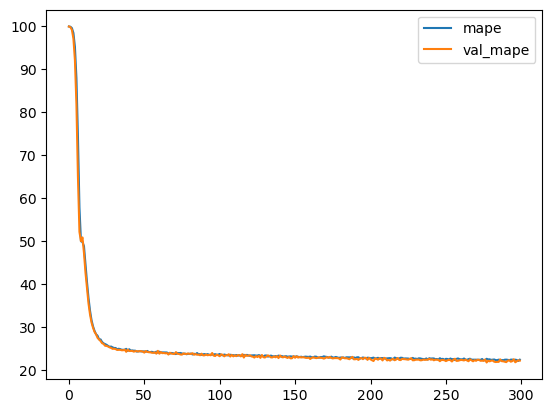

In [236]:
early_stopping = callbacks.EarlyStopping(min_delta=0.009,patience=30,restore_best_weights=True)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[shapee]),
    layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',metrics=['mape']
)
history = model.fit(
    x_train_N.values, y_train_N.values,
    validation_data=(x_valid_N.values, y_valid_N.values),
    batch_size=512,
    epochs=300,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['mape', 'val_mape']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
print(history_df["mape"].min())









<AxesSubplot:>

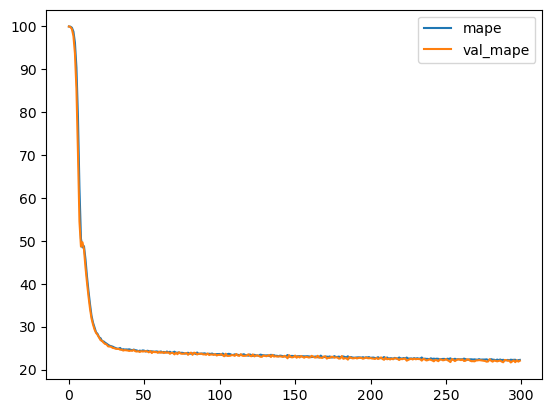

In [164]:
history_df.loc[:, ['mape', 'val_mape']].plot()

In [237]:
ypreed=model.predict(x_test_N.values)
ypreed

104/104 [==============================] - 0s 2ms/step


array([[405575.62],
       [156743.11],
       [109046.67],
       ...,
       [179197.11],
       [196377.44],
       [214278.98]], dtype=float32)

In [238]:
y_test_N.values.reshape(-1,1)
y_test_N

9438     500001.0
10389    222100.0
8845     123400.0
15344     92700.0
1654      90300.0
           ...   
1795     107500.0
1650     386400.0
3204     135000.0
15135    202600.0
15162    201500.0
Name: median_house_value, Length: 3303, dtype: float64

In [239]:
mean_absolute_percentage_error(y_test_N, ypreed)

0.21836366591337436

In [140]:
y_test_N

4254      93900.0
13820    304900.0
1018     142600.0
6958      71400.0
12359    263800.0
           ...   
7181     273000.0
12524    236400.0
9558     158600.0
2124     118800.0
9387      79200.0
Name: median_house_value, Length: 2477, dtype: float64

In [240]:
d1=pd.DataFrame(ypreed,index=x_test_N.index,columns=["predicted"])
d2=pd.DataFrame(y_test_N.values.reshape(-1,1),index=x_test_N.index,columns=["actual"])
d3=pd.merge(d1,d2,left_index=True,right_index=True)
da=d3.reset_index()
da

,index,predicted,actual
0,9438,405575.625000,500001.0
1,10389,156743.109375,222100.0
2,8845,109046.671875,123400.0
3,15344,130437.921875,92700.0
4,1654,91442.406250,90300.0
...,...,...,...
3298,1795,109435.671875,107500.0
3299,1650,340807.000000,386400.0
3300,3204,179197.109375,135000.0
3301,15135,196377.437500,202600.0


<AxesSubplot:>

<Figure size 1600x800 with 0 Axes>

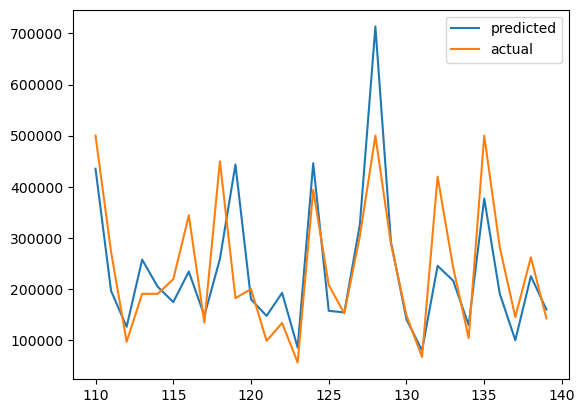

In [242]:
plt.figure(figsize=(16,8))
da[["predicted","actual"]][110:140].plot()

